<a href="https://colab.research.google.com/github/KenzaChraibi/Devoir-ML2/blob/main/2023_Math80600A_Devoir_1_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apprentissage automatique II: Apprentissage profond et ses applications
# Devoir 1

**Date de remise:  15 février**

### Instructions
- Faites une copie de ce bloc-notes sur votre propre Google Drive et répondez aux questions qui s'y trouvent.
- Vous pouvez ajouter plus de cellules si nécessaire. Vous pouvez également ajouter des descriptions à votre code, bien que ce ne soit pas obligatoire.
- Assurez-vous que le bloc-notes peut être exécuté par *Exécution -> Tout exécuter*. **Dérouler toutes les cellules** afin de faciliter l'évaluation.
- Enregistrer le lien de votre bloc-notes [ici](https://docs.google.com/forms/d/e/1FAIpQLSfcK31V4E16aSN1G26BHqcdmn2qGcPLO7RAlJRvbU_blrUz8g/viewform?usp=sharing). Veuillez **activer la modification ou les commentaires** afin que vous puissiez recevoir des commentaires des correcteur.trice.s.
  - Ajoutez zuobai.zhang@gmail.com et jiaruilu27@gmail.com en tant qu'**éditeur** sur votre devoir de code Colab.

Installation des bibliothèques Pytorch et Torchvision

In [1]:
!pip install -q torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchtext==0.9.0 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 863.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision import transforms

## 1) Opérations sur les tenseurs (30 points)

Les opérations tensorielles sont importantes dans les modèles d'apprentissage profond. Dans cette partie, vous devrez implémenter certaines opérations tensorielles courantes en PyTorch.

### 1.1) Serrage (*squeezing*), desserrage (*unsqueezing*) et visualisage (*viewing*)

Le serrage (squeezing), desserrage (unsqueezing) et visualisage (viewing) d'un tenseur sont des opérations importantes afin de changer les dimensions d'un tenseur. Comme nous l'avons vu dans le tutoriel, les fonctions de base sont [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) et [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Veuillez lire la documentation associée et effectuez l'exercice suivante.

In [ ]:
# x est un tenseur ayant pour dimension (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])


# Ajouter deux nouvelles dimensions à x en utilisant la fonction torch.unsqueeze, de façon telle à ce que les dimensions de x soient de (3,1,2,1.
x = torch.unsqueeze(torch.unsqueeze(x,1),3)

# Enlever les deux dimensions précédemment ajoutées en utilisant la fonction torch.squeeze de façon telle à retrouver les dimensions d'origine.
x = torch.squeeze(x)

# Utilisez la fonction torch.Tensor.view afin de transformer le tenseur en deux dimensions en un tenseur d'une unique dimension et de longeur 6.
x = x.view(6)

### 1.2) Concaténation et empilage

La concaténation et l'empilage de tenseurs sont des opérations permettant de combiner de petits tenseurs en grands tenseurs.

Les fonctions correspondantes sont [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) et [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Veuillez lire la documentation associée et effectuez l'exercice suivante.

In [ ]:
# x est un tenseur ayant pour dimension (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y est un tenseur ayant pour dimension (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])


# Nous voulons créer un tenseur z de dimensions (2, 3, 2) tel que z[0,:,:] = x et z[1,:,:] = y.

# Utilisez torch.stack pour créer pareil tenseur
z = torch.stack((x,y),0)
# Utilisez torch.cat et torch.unsqueeze pour créer pareil tenseur
z = torch.cat((torch.unsqueeze(x,0), torch.unsqueeze(y,0)),0)

### 1.3) Expansion

L'expansion d'un tenseur consiste à étendre un tenseur en un tenseur plus grand le long des dimensions du singleton. Les fonctions correspondantes sont [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) et [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Veuillez lire la documentation associée et effectuez l'exercice suivante.


Enfin, expliquez sous forme de commentaire en une ou deux phrases MAXIMUM quelles sont les différences entre les fonctions suivantes:

```
torch.Tensor.view()
torch.Tensor.expand()
torch.Tensor.reshape()
torch.Tensor.repeat()
```

In [ ]:
# x est un tenseur ayant pour dimension (3)
x = torch.Tensor([1, 2, 3])

# Nous voulons créer un tenseur z de dimensions (2, 3) tel que z[0,:] = x, z[1,:] = x.

# Changez la dimension de x en un tenseur de dimension (1, 3) à l'aide de torch.unsqueeze
x = torch.unsqueeze(x,0)
# Déroulez ensuite le nouveau tenseur au tenseur cible en utilisant torch.Tensor.expand.
z = x.expand(2,3)

**Réponse théorique à la question 1.3)**

Torch.Tensor.view permet de changer visuellement (view) les dimensions d'un tensor tout en conservant les données et le nombre d'éléments inchangés (exemple de [3,2] à [6]), mais les données sont toujours écrites de la même façon dans la mémoire alors que Torch.Tensor.reshape fait exactement la même chose, mais pourrait changer ce qui est écrit dans la mémoire en faisant une copie au lieu d'une vue si les transformations demandées le rendent nécessaire (non-contiguous storage). 

Torch.Tensor.expand permet d'augmenter les dimensions de 1 en des dimensions plus grandes en dupliquant le tensor dans la direction concernée, mais sans changer les dimensions différentes de 1 (exemple [3,1] en [3,2]) alors que Torch.Tensor.repeat permet de répéter un tensor un nombre donné de fois dans les directions voulues, peu importe la dimension initiale.

### 1.4) Réduction pour une dimension choisie

En apprentissage profond, nous avons souvent besoin de calculer la valeur moyenne/somme/max/min dans une dimension donnée d'un tenseur. Veuillez vous référer [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk) et complétez le code ci-dessous.

In [ ]:
# x est un tenseur de dimension (10, 50)
x = torch.randn(10, 50)

# Calculez la valeur moyenne pour chaque ligne de x.
# Vous devez générer un tenseur x_mean de taille (10), où x_mean[k] est la valeur moyenne de la k-ième ligne de x.
x_mean = torch.mean(x,1)
# Calculer la valeur somme pour chaque ligne de x.
# Vous devez générer un tenseur x_sum de taille (10).
x_sum = torch.sum(x,1)
# Calculez la valeur maximale pour chaque ligne de x.
# Vous devez générer un tenseur x_max de taille (10).
x_max = torch.max(x,1)[0]
# Calculez la valeur min pour chaque ligne de x.
# Vous devez générer un tenseur x_min de taille (10).
x_min = torch.min(x,1)[0]
# Calculez les 5 plus grandes valeurs pour chaque ligne de x.
# Vous devez générer un tenseur x_top de taille (10, 5), où x_top[k, :] est les 5 plus grandes valeurs de la k-ième ligne de x.
x_top = torch.topk(x,5,1)[0]

### 1.5) Opérations avancées

En apprentissage profond, nous souhaitons souvent ne modifier qu'une partie d'un tenseur ou ne collecter que des valeurs à partir d'indices spécifiques. A ces fins, on utilise souvent ```torch.gather``` ou ```torch.scatter```, voir leur définition [ici](https://pytorch.org/docs/stable/tensors.html?highlight=scatter#torch.Tensor.scatter). 

Notez que vous **n'êtes pas obligé.e.s** d'utiliser ces fonctions et que certaines parties de la question peuvent ne pas en avoir besoin.

In [ ]:
ind = torch.randint(50,(10,50))
x = torch.randn(10,50,50)

# Sélectionnez pour tout i,j les valeurs x[i,j,k] où ind[i,j] = k dans le tenseur
# Le tenseur doit avoir la forme (10,50)
x1 = torch.gather(x,2,ind.view(10,50,1)).view(10,50)
# Doublez pour tout i,j les valeurs x[i,j,k] où ind[i,j] = k en laissant toutes les autres valeurs de x intactes
# Le tenseur retourné doit avoir la forme (10,50,50)
x2=x+0
x2.scatter_(2,ind.view(10,50,1),2,reduce='multiply')

ind = ind[:, 0]
# Sélectionnez les valeurs de x[i,l,j] où l = ind[k] pour tous les i,j,k
# Le tenseur retourné doit avoir la forme (10,10,50)
x3 = torch.Tensor(10,10,50)
for i in np.arange(0,10,1):
  for j in np.arange(0,50,1):
    for k in np.arange(0,10,1):
      l = ind[k]
      x3[i][k][j]=x[i][l][j]

## 2) CNNs (40 points)



Implémentez un CNN pour la classification d'images sur l'ensemble de données CIFAR-10.

CIFAR-10 est un jeu de données d'images de 10 catégories. Chaque image a une taille de 32x32 pixels. Le code suivant téléchargera l'ensemble de données et le divisera en *train* et *test*.

Pour cette question, nous divisons les données d'entrainement (80 %) et de validation (20 %) pour la sélection des hyperparamètres.

In [3]:
t = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=t)
test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download=True, transform=t)

N = len(train_dataset)
indices = np.arange(N)
np.random.shuffle(indices)
n = int(0.8 * N)
print('{} for training,\t{} for validation'.format(n, N-n))
train_indices = indices[:n]
valid_indices = indices[n:]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_indices)

# Entrainement du modele
# NE PAS MODIFIER
def train(model, dataloader, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for X, y in dataloader:
        logits = model(X.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, y.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, y.cuda()).sum().item()
        total_prediction += y.size(0)
    return total_loss / len(dataloader), total_correct / total_prediction

# Évalation du modele
# NE PAS MODIFIER
def evaluate(model, dataloader, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            logits = model(X.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, y.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, y.cuda()).sum().item()
            total_prediction += y.size(0)
    return total_loss / len(dataloader), total_correct / total_prediction

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
40000 for training,	10000 for validation


Le code suivant permet de visualiser certains exemples dans l'ensemble de données. Vous pouvez l'utiliser pour déboguer votre modèle si nécessaire.

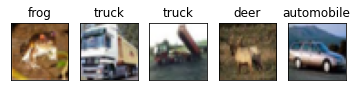

In [ ]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train_dataset.labels = [train_dataset.classes[target] for target in train_dataset.targets]
plot(train_dataset.data, train_dataset.labels)

### 2.1) Rudiments pour l'implémentation d'un CNN


Soit un CNN vanille constitué de:

- Trois couches de convolutions suivie d'une couche linéaire tel que vue lors de la troisième semaine.
- Chaque couche de convolution est associée à un noyau de dimension 3, avec une marge de de zéros de dimension 1.
- Une fonction d'activation ReLU après chaque couche cachée..

Veuillez implémenter ce modèle dans la section suivante. Vous devrez ajuster les hyperparamètres et remplir les résultats dans le tableau.

#### a) Implémentation des couches de convolution


Implémentez la fonction d'initialisation et la fonction de transfert du CNN.

In [ ]:
class CNN(nn.Module):
  def __init__(self, cancv1, cancv2, cancv3):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, cancv1, 3, padding=1)
    self.conv2 = nn.Conv2d(cancv1, cancv2, 3, padding=1)
    self.conv3 = nn.Conv2d(cancv2, cancv3, 3, padding=1)
    self.fc = nn.Linear(32 * 32 * cancv3, 10)
    # initialisation des paramètres ici
  
  def forward(self, images):
    images = F.relu(self.conv1(images))
    images = F.relu(self.conv2(images))
    images = F.relu(self.conv3(images))
    images = torch.flatten(images, 1)
    images = self.fc(images)
    # implémentation de la fonction forward ici
    return images

#### b) Sélection d'hyper paramètres

Entraînez le modèle CNN sur l'ensemble de données CIFAR-10. Sélectionnez le nombre de canaux (ou *feature maps*), l'optimiseur, le pas d'apprentissage et le nombre d'époques pour une meilleure précision de validation.

In [ ]:
# Sélectionnez le type d'optimiseur et les hyperparamètres avec le code suivant comme exemple
batch_size = 128

### Hyperparamètres à modifier ###
EPOCHS = 20
cancv1 = 512; cancv2 = 512; cancv3 = 512

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
valid_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for lr in [1e-4, 5e-4, 1e-3, 5e-3]:
  print('lr : ', lr)
  # Initialisation du modèle
  model = CNN(cancv1, cancv2, cancv3)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  #optimizer = optim.SGD(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()
  model.cuda()

  # Apprentissage et phase de test
  # Vous pouvez réutiliser le bloc de codage suivant pour le réglage des hyperparamètres
  # N'hésitez pas à essayer des stratégies d'entraînement plus avancées
  best_valid_acc = 0.0
  best_epoch = 0
  best_state_dict = copy.deepcopy(model.state_dict())
  for epoch in range(EPOCHS):
      train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
      valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)

      print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_state_dict = copy.deepcopy(model.state_dict())
          best_epoch = epoch + 1
  print(best_valid_acc, best_epoch)


Notez les **performances de validation** de votre modèle sous différents paramètres d'hyperparamètres.

**Indice:** Vous aurez peut-être besoin de plus d'époques pour SGD qu'Adam.

**Réponse**: La performance enregistrée est en terme de valid_acc pour la meilleure combinaison (lr, EPOCHS)

| #Canaux par couche \ optimiseur | SGD (lr, epochs)| Adam (lr, epochs)|
|---------------------------------|-----------------|------------------|
| (128, 128, 128)                 | 0.502 (1e-3, 46)| 0.679 (5e-4, 6)  |
| (256, 256, 256)                 | 0.641 (5e-3, 47)| 0.673 (1e-4, 6)  |
| (512, 512, 512)                 | 0.642 (5e-3, 37)| 0.671 (1e-4, 6)  |


### 2.2) Implémentation d'un CNN

Sur la base du CNN de la question précédente, implémentez un CNN complet avec une couche de *max pooling*.

- Ajoutez une couche de *max pooling* après chaque couche de convolution.
- Chaque couche de *max pooling* a une taille de noyau de 2 et une foulée (*stride*) de 2.

Veuillez implémenter ce modèle dans la section suivante. Vous devrez ajuster les hyperparamètres et remplir les résultats dans le tableau. Vous devez également répondre aux questions.

#### a) CNN avec fonction de *max pooling*

Copiez l'implémentation CNN dans la question précédente et initialisez les couches de *max pooling*.

In [4]:
class CNN_MaxPool(nn.Module):
  def __init__(self, cancv1, cancv2, cancv3):
    super(CNN_MaxPool, self).__init__()
    self.conv1 = nn.Conv2d(3, cancv1, 3, padding=1)
    self.conv2 = nn.Conv2d(cancv1, cancv2, 3, padding=1)
    self.conv3 = nn.Conv2d(cancv2, cancv3, 3, padding=1)
    self.maxp = nn.MaxPool2d(2,2)
    self.fc = nn.Linear(4 * 4 * cancv3, 10)
    # initialisation des paramètres ici
  
  def forward(self, images):
    images = self.maxp(F.relu(self.conv1(images)))
    images = self.maxp(F.relu(self.conv2(images)))
    images = self.maxp(F.relu(self.conv3(images)))
    images = torch.flatten(images, 1)
    images = self.fc(images)
    # implémentez la fonction forward ici
    return images

#### b) Sélection d'hyper paramètres

Sur la base du meilleur optimiseur que vous avez trouvé dans le problème précédent, choisissez le nombre de canaux et le pas d'apprentissage pour une meilleure formance de validation.

In [ ]:
# initialisation des hyper paramètres ici
batch_size = 128

### Hyperparamètres à modifier ###
EPOCHS = 40

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
valid_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# entraînement du modèle là
for cancv1, cancv2, cancv3 in [(64, 64, 64), (128, 128, 128), (128, 256, 512), 
                               (256, 256, 256), (256, 512, 1024), 
                               (512, 512, 512), (512, 1024, 2048)]:
  for lr in [1e-4, 5e-4]:
    print('lr : ', lr, 'canaux :', cancv1, cancv2, cancv3)
    # Initialisation du modèle
    model = CNN_MaxPool(cancv1, cancv2, cancv3)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    model.cuda()

    # Apprentissage
    best_valid_acc = 0.0
    best_epoch = 0
    best_state_dict = copy.deepcopy(model.state_dict())
    for epoch in range(EPOCHS):
        train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
        valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)

        print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_state_dict = copy.deepcopy(model.state_dict())
            best_epoch = epoch + 1
    print(best_valid_acc, best_epoch)


Notez la **précision de validation** de votre modèle sous différents paramètres et hyperparamètres.

**Réponse**: La performance enregistrée est en terme de valid_acc pour la meilleure combinaison (lr, EPOCHS) et l'optimiseur Adam (le plus performant selon les résultats en 2.1-b).

| #Canaux pour chaque couche | Performance de validation (lr, EPOCHS)|
|----------------------------|---------------------------------------|
| (64, 64, 64)               |    0.719 (5e-4, 33)                   |
| (128, 128, 128)            |    0.731 (5e-4, 20)                   |
| (128, 256, 512)            |    0.747 (5e-4, 14)                   |
| (256, 256, 256)            |    0.746 (5e-4, 17)                   |
| (256, 512, 1024)           |    0.752 (5e-4, 13)                   |
| (512, 512, 512)            |    0.749 (5e-4, 10)                   |
| (512, 1024, 2048)          |    0.778 (1e-4, 28)                   |


Pour le meilleur modèle obtenue, testez-le sur l'ensemble de test.

Aucun souci si vous avez trouvé une combinaison d'hyperparamètres meilleure que celles répertoriées dans les tableaux.

In [ ]:
# Évaluez le modèle ici
# Entraînez le modèle sur l'ensemble d'entraînement
# Trouvez le meilleur modèle/hyperparamètre avec l'ensemble de validation

# initialisation des données
batch_size = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
valid_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialisation du modèle
cancv1 = 512; cancv2 = 1024; cancv3 = 2048
lr = 1e-4
EPOCHS = 28
model = CNN_MaxPool(cancv1, cancv2, cancv3)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
model.cuda()

# Apprentissage
best_valid_acc = 0.0
best_epoch = 0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())
        best_epoch = epoch + 1
    if best_valid_acc >= 0.778:
       break
print(best_valid_acc, best_epoch)

# Appliquez ce meilleur modèle sur l'ensemble de test
model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_dataloader, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

Quel est la **performance sur l'ensemble test** obtenue?

**Votre réponse:**

Que pouvez-vous conclure pour la conception d'architectures d'un CNN ?

**Votre réponse:**

De manière générale, peu importe l'architecture choisie, l'optimiseur Adam semble mieux performer et être plus rapide (moins d'epochs nécessaires) que l'optimiseur SGD. Il a aussi besoin d'un taux d'apprentissage (lr) plus petit. 

Ensuite, avec Adam, on remarque facilement que l'ajout de la couche de pooling après chaque convolution améliore les performances pour une même architecture, mais augmente également le nombre d'itérations nécessaires (epochs). Pour des réseaux de profondeur égale, l'augmentation de la largeur des couches (nombre de canaux) améliore elle aussi les performances. Les plus grandes architectures convergent plus rapidemment vers leur taux de performance optimal en validation et semblent par le fait même commencer à sur-apprendre plus vite que les petites, ce qui est normal, car ce sont des modèles de plus grande capacité. Cependant, elles sont beaucoup plus longues à entraîner. Finalement, le fait de garder une largeur constante à travers les différentes couches n'est pas vraiment différent du fait d'augmenter progressivement la largeur.

## 3) RNNs (40 points)

Utilisons PyTorch pour implémenter un RNN pour l'analyse des sentiments, c'est-à-dire classer les phrases sous l'une des trois catégories de sentiment, soit compris positifs, négatifs ou neutres.

Nous utilisons un ensemble de données de référence (c'est-à-dire SST) pour cette tâche. Tout d'abord, téléchargeons l'ensemble de données SST et effectuons un prétraitement pour créer un vocabulaire et diviser l'ensemble de données en ensembles d'apprentissage/validation/test. Définissons également la fonction d'entraînement et d'évaluation. Veuillez ne pas modifier les fonctions.

In [8]:
import torch
from torch import nn
from torch import optim

import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# telecharger les donnees et les diviser en sous ensembles
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# construction d'un dictionnaire
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 128

# construction des iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data), 
    batch_size=32)

# Apprentissage
# NE PAS MODIFIER
def train(model, iterator, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        logits = model(batch.text.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, batch.label.cuda())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
        total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

# Evaluation
# NE PAS MODIFIER
def evaluate(model, iterator, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            logits = model(batch.text.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, batch.label.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
            total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

downloading trainDevTestTrees_PTB.zip


trainDevTestTrees_PTB.zip: 100%|██████████| 790k/790k [00:01<00:00, 560kB/s]


extracting


Ensuite, nous sommes prêts à construire notre RNN pour l'analyse des sentiments. Dans le code suivant, nous avons fourni plusieurs hyperparamètres dont nous avions besoin pour construire le modèle, y compris la taille du vocabulaire (vocab_size), la dimension d'intégration du mot (embedding_dim), la dimension de la couche cachée (hidden_dim), le nombre de couches (num_layers) et le nombre de catégories de phrases (label_size). Veuillez compléter le code  et implémenter un modèle RNN après avoir lu les instructions du dernier  [blocs](https://colab.research.google.com/drive/1D_ERWxDEFDKH92KjPVpL3dVObpiOIMqF#scrollTo=PbqSAz90zBYi).

In [13]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 1

        # Ajoutez les couches requises pour l'analyse des sentiments.
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, padding_idx=padding_idx)
        self.rnn_cell = nn.RNN(self.embedding_dim, self.hidden_dim, self.num_layers, 
                               batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(self.hidden_dim, self.label_size)
        self.sm = nn.Softmax(dim=-1)

    def zero_state(self, batch_size): 
        # Implémente la fonction qui renvoie un état caché initial.
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim, device='cuda')

    def forward(self, text):
        # Implémenter la fonction forward du modèle.
        embedding = self.embedding(text) #batch, time_steps, embedding_dim
        h0 = self.zero_state(text.size()[0])
        out, hn = self.rnn_cell(embedding, h0)
        output = self.sm(self.fc(torch.squeeze(hn)))
        return output

Enfin, nous sommes prêts à entraîner le modèle et à calculer ses performances.


In [ ]:
# Sélectionnez le type d'optimiseur et les hyperparamètres avec le code suivant comme exemple
batch_size = 128
lr = 1e-4
EPOCHS = 30

# Initialisation du modèle
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
model.cuda()
criterion.cuda()

# Entraînement et test du modèle
# Vous pouvez réutiliser le bloc de codage suivant pour la sélection des hyperparamètres
# N'hésitez pas à essayer des stratégies d'entraînement plus avancées
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_iter, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())

Une fois que nous avons trouvé les meilleurs hyperparamètres pour l'ensemble de validation, nous pouvons maintenant évaluer notre modèle sur l'ensemble de test.

In [ ]:
# Évaluez le modèle ici
# Entraînez le modèle sur l'ensemble d'apprentissage
# Trouvez le meilleur modèle/hyperparamètre avec l'ensemble de validation et calculer ses performances sur l'ensemble de test

# Initialisation du modèle
batch_size = 128
lr = 0.1
EPOCHS = 30
embedding_dim = 128
hidden_dim = 256

model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
model.cuda()
criterion.cuda()

# Entraînement
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_iter, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())

model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_iter, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

### 3.1) Implémentation d'un RNN

Le code actuel du modèle RNN n'est pas complet, complétons donc d'abord le code pour implémenter un modèle RNN vanille en remplissant le [bloc](https://colab.research.google.com/drive/1xNVJEYUxebI9xSA86AAjjtzVpUDUWuaF?authuser=3#scrollTo=kWUKPgDGNQSr).

- **Sous-tâche 1-1: Création de toutes les couches requises dans votre modèle**

N'oubliez pas que lors de la construction d'un modèle d'apprentissage profond, nous devons d'abord compléter la fonction **init** en créant toutes les couches requises. Dans notre cas, puisque nous utilisons des RNNs pour la classification des phrases, nous avons besoin d'une couche d'intégration (*embedding*) pour transformer les mots en intégrations (*embedding*) de mots, d'une couche RNN pour transformer les intégrations (*embedding*) de mots en codages de phrases, d'une fonction d'activation et d'une couche linéaire ainsi que d'une fonction softmax pour le classement des phrases.

Ceci étant, veuillez créer toutes les couches nécessaires de votre modèle RNN dans la fonction **init**. Notez que nous avons déjà ajouté la couche d'intégration de mots pour vous.

- **Sous-tâche 1-2: Implémentation de la fonction d'initialisation des états cachés**

Rappelez-vous que lors de l'application d'une unité RNN pour transformer des intégrations (*embedding*) de mots en codages de phrases, l'unité RNN part d'un vecteur caché initial avec toutes les valeurs nulles et lit séquentiellement chaque mot pour mettre à jour le vecteur caché. Enfin, le vecteur caché obtenu après lecture du dernier mot est traité comme l'encodage de la phrase.

Veuillez implémenter la fonction **zero_state**, qui renvoie un lot de vecteurs cachés initiaux en fonction d'une taille de lot (*batch*). Astuce : votre fonction doit renvoyer un tenseur avec toutes les valeurs nulles. Vous pouvez vous référer au [document officiel](https://pytorch.org/docs/stable/nn.html#rnn) pour définir les dimensions adéquates pour le tenseur.

- **Sous-tâche 1-3: Implémentation de la fonction forward**

Enfin, nous sommes prêts à construire la fonction *forward*, qui prend un lot de phrases en entrée et renvoie un lot de logits. Pour être plus précis, l'entrée est donnée par le tenseur appelé $\text{text}$, et la taille du tenseur est $(B, L)$, $B$ étant la taille du lot, $L$ étant la longueur maximale des phrases dans ce lot et $\text{text}[i, j]$ étant l'identifiant entier du $j$-ème mot dans la $i$-ème phrase. Étant donné le tenseur en entrée, votre fonction  doit renvoyer un tenseur logit de taille $(B, C)$, $B$ étant la taille du lot et $C$ étant le nombre de classes possibles.

Veuillez implémenter la fonction de *forward* en fonction des instructions ci-dessus. Notez que nous avons déjà appliqué la couche d'intégration de mots à l'entrée de texte et obtenu un tenseur appelé $\text{embedding}$, et la taille du tenseur est $(B, L, D)$, où $D$ est le mot dimension d'intégration. Vous pouvez directement opérer sur le tenseur $\text{embedding}$ pour calculer les logits.

### 3.2) Étude des différents optimiseurs

Lors de la tâche précédente, nous avons implémenté un modèle RNN pour l'analyse des sentiments, ou plus généralement la classification des phrases.

Pour mieux comprendre plusieurs concepts en apprentissage profond, faisons quelques études d'ablation en utilisant le modèle que nous venons d'implémenter.

La première tâche consiste à essayer différents optimiseurs pour votre modèle, où pour chaque optimiseur, vous pouvez également essayer différentes valeurs de pas d'apprentissage.

In [ ]:
batch_size = 128
EPOCHS = 30

for lr in [0.1, 0.01, 0.001, 0.0001]:
  print('lr :', lr)
  # Initialisation du modèle
  model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
  #optimizer = optim.SGD(model.parameters(), lr=lr)
  #optimizer = optim.Adam(model.parameters(), lr=lr)
  optimizer = optim.RMSprop(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()
  model.cuda()
  criterion.cuda()

  # Entraînement et test du modèle
  best_valid_acc = 0.0
  best_state_dict = copy.deepcopy(model.state_dict())
  for epoch in range(EPOCHS):
      train_loss, train_acc = train(model, train_iter, optimizer, criterion)
      valid_loss, valid_acc = evaluate(model, val_iter, criterion)

      print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_state_dict = copy.deepcopy(model.state_dict())
          best_epoch = epoch + 1
  print(best_valid_acc, best_epoch)

- **Sous-tâche 2-1: Remplir le tableau**

Nous avons fourni le tableau suivant pour différentes combinaisons d'optimiseurs et de pas d'apprentissage. Veuillez noter la **performance de validation** de votre modèle avec différents optimiseurs et taux d'apprentissage.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     | 0.563| 0.499| 0.472| 0.388|
| Adam    |  nan | 0.394| 0.433| 0.537|
| RMSprop |  nan |  nan | 0.492| 0.535|

- **Sous-tâche 2-2: Expliquez vos résultas**

En fonction de vos résultats, expliquez BRIÈVEMENT vos observations, par exemple, quel optimiseur fonctionne le mieux, quel est le taux d'apprentissage optimal pour chaque optimiseur ?

***Votre réponse:***

La première observation concerne les nan présents dans le tableau. En fait, le modèle donne une performance de 0.403 en tout temps, ce qui donne l'impression qu'il n'apprend pas grand chose. Le loss quant à lui donne directement nan. De ce fait, les optimiseurs Adam et RMSprop semblent mieux fonctionner avec des petits taux d'apprentissage. Ils atteignent tous les deux leur performance maximale pour lr=0.0001, ce qui est tout de même comparable à la performance du SGD. Par contre, pour SGD, c'est le contraire. Sa performance diminue en même temps que le taux d'apprentissage. Son meilleur résultat est pour lr=0.1, ce qui correspond à la meilleure performance parmi l'ensemble des optimiseurs.


### 3.3) Comparez les résultats en fonction du nombre d'époques

Nous comparerons les résultats de notre modèle pour différents nombres d'époques d'entraînement.

In [ ]:
batch_size = 128
lr = 0.1

for EPOCHS in [10, 20, 30, 40, 50]:
  print('epochs :', EPOCHS)
  # Initialisation du modèle
  model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
  optimizer = optim.SGD(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()
  model.cuda()
  criterion.cuda()

  # Entraînement et test du modèle
  best_valid_acc = 0.0
  best_state_dict = copy.deepcopy(model.state_dict())
  for epoch in range(EPOCHS):
      train_loss, train_acc = train(model, train_iter, optimizer, criterion)
      valid_loss, valid_acc = evaluate(model, val_iter, criterion)

      print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_state_dict = copy.deepcopy(model.state_dict())

  print(train_acc, valid_acc)

- **Sous-tâche 3-1: Completez le talbeau**

Veuillez présenter les **performances d'entraînement et de validation** de votre modèle avec différents nombres d'époques d'entraînement dans le tableau suivant.

|                           |  10  |  20  |  30  |  40  |  50  |
|---------------------------|------|------|------|------|------|
| Performance d'entraînement| 0.420| 0.421| 0.424| 0.434| 0.423|
| Performance de validation | 0.397| 0.398| 0.423| 0.412| 0.403|


- **Subtask 3-2: Répondre à la question**

Est-il toujours préférable d'entraîner un modèle sur plusieurs époques ? Comment pouvons-nous décider quand arrêter l'entraînement?

***Votre réponse:***

Comme on peut le voir avec la performance en entraînement, plus on augmente le nombre d'epochs, plus on a globalement un meilleur résultat, ce qui est attendu puisque nous donnons à notre modèle plus de chance de comprendre les données d'entraînement pour essayer de s'y coller au mieux. Par contre, au niveau de la performance en validation, elle atteint son résultat optimal autour de 30 epochs. En effet, augmenter le nombre d'epochs mènent tout droit au phénomène de sur-apprentissage. Un nombre d'epochs trop petit peut ne pas être suffisant pour permettre au modèle de comprendre la structure des données alors qu'un nombre trop grand d'epochs peut empêcher le modèle de bien généraliser. On peut donc arrêter d'entraîner notre modèle quand on observe que la performance en validation cesse de croître pour au contraire commencer à diminuer, ce qui donne le meilleur compromis.

### 3.4) Étude de la capacité des modèles

En pratique, nous pouvons également faire varier la capacité de notre modèle afin de trouver le modèle optimal. Veuillez tester différentes configurations de votre modèle, lesquelles ont des capacités différentes. Sur la base de vos observations, veuillez également répondre à la question.

In [ ]:
# Initialisation du modèle
batch_size = 128
lr = 0.1
EPOCHS = 30

for embedding_dim in [64, 128, 256]:
  for hidden_dim in [64, 128, 256]:
    print('embedding_dim :', embedding_dim, 'hidden_dim :', hidden_dim)
    model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    model.cuda()
    criterion.cuda()

    # Entraînement
    best_valid_acc = 0.0
    best_state_dict = copy.deepcopy(model.state_dict())
    for epoch in range(EPOCHS):
        train_loss, train_acc = train(model, train_iter, optimizer, criterion)
        valid_loss, valid_acc = evaluate(model, val_iter, criterion)

        print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_state_dict = copy.deepcopy(model.state_dict())
    print(best_valid_acc)

- **Sous-tâche 4-1: Complétez le tableau**

Veuillez noter la **performance de validation** de votre modèle pour différentes capacités de modèle (c'est-à-dire, spécifiée par les termes  *embedding dim* et *couche cachée dim*).

|Embedding dim / hidden dim |  64   |  128  |  256  |
|---------------------------|-------|-------|-------|
| 64                        | 0.559 | 0.559 | 0.562 |
| 128                       | 0.547 | 0.497 | 0.565 |
| 256                       | 0.561 | 0.563 | 0.478 |

- **Sous-tâche 4-2: Répondre à la question**

Est-il toujours préférable d'augmenter la capacité du modèle dans ce cas? Est-il toujours préférable d'augmenter la capacité du modèle en général? Comment décider de la bonne capacité du modèle en pratique ?

***Votre réponse:***

Il n'est pas toujours préférable d'augmenter la capacité du modèle, car on voit clairement que le pire résultat est obtenu lorsque les deux types de capacité prennent simultanément leur plus grande valeur dans le tableau. De manière générale, le même postulat peut être posé. En effet, plus on augmente la capacité d'un modèle, plus il est en mesure de se coller parfaitement aux données d'entraînement, ce qui rend la généralisation beaucoup plus ardue. Par contre, le modèle doit avoir une capacité suffisante pour comprendre les données et éviter le sous-apprentissage. En pratique, le niveau de capacité à choisir dépend du nombre de données et de la complexité de la tâche à résoudre. Plus on a de données, plus on va avoir besoin d'une grande capacité pour bien les cerner. Également en pratique, on utilise souvent des techniques de régularisation pour diminuer la capacité des modèles trop complexes sans avoir à changer complètement de modèle.
